### Importing necessary Libraries:

In [1]:
#pip install xgboost
#pip install tabulate

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

##### Importing the dataset

In [3]:
house_df = sklearn.datasets.load_boston()

In [4]:
house_df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

##### Loading the dataset to a dataframe

In [5]:
df = pd.DataFrame(house_df.data, columns= house_df.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### Adding the target column to the dataframe

In [6]:
df['PRICE']= house_df.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### Displaying basic information about the dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Shape of the dataset:",df.shape)

Number of rows: 506
Number of columns: 14
Shape of the dataset: (506, 14)


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

### Checking for null values:

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

There are no null values!

### Splitting the data to Dependent (y) and independent (x) variables:

In [12]:
x = df.drop(['PRICE'],axis=1)
y = df['PRICE']

In [13]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

### Train Test Split

In [15]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
print("Shape of train data:")
print("Shape of Train X:",train_x.shape)
print("Shape of Train Y:",train_y.shape)

print("\nShape of test data:")
print("Shape of Test X:",test_x.shape)
print("Shape of Test Y:",test_y.shape)

Shape of train data:
Shape of Train X: (404, 13)
Shape of Train Y: (404,)

Shape of test data:
Shape of Test X: (102, 13)
Shape of Test Y: (102,)


### Checking for Linearity:

Scatter plot for Linearity

Price vs CRIM


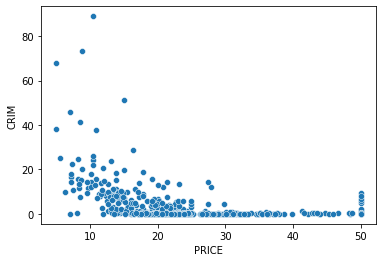

Price vs ZN


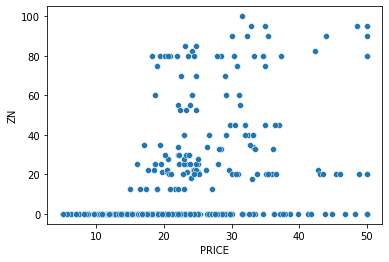

Price vs INDUS


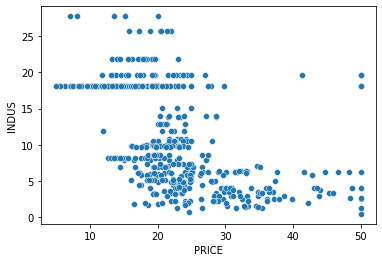

Price vs CHAS


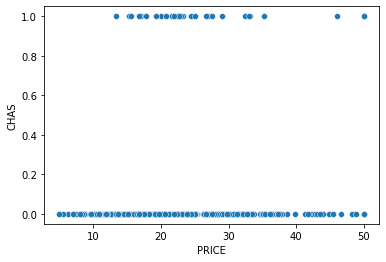

Price vs NOX


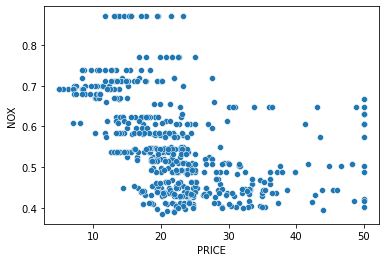

Price vs RM


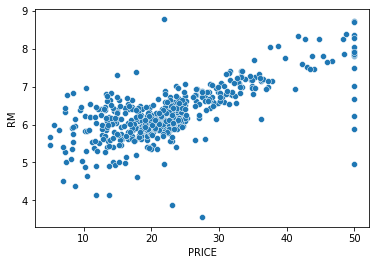

Price vs AGE


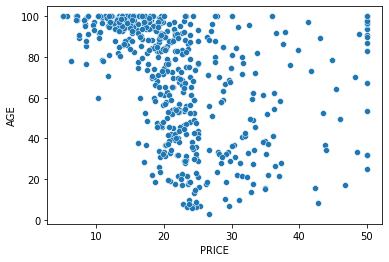

Price vs DIS


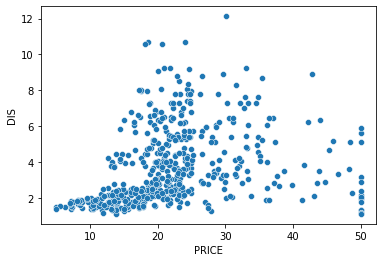

Price vs RAD


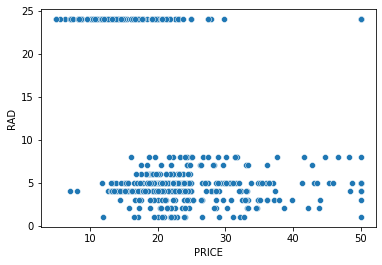

Price vs TAX


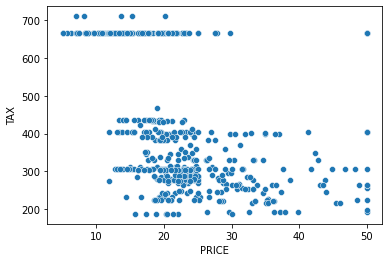

Price vs PTRATIO


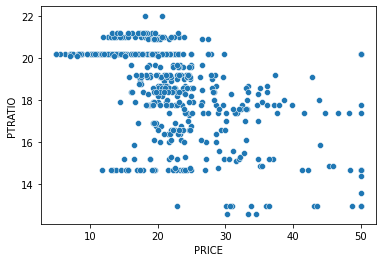

Price vs B


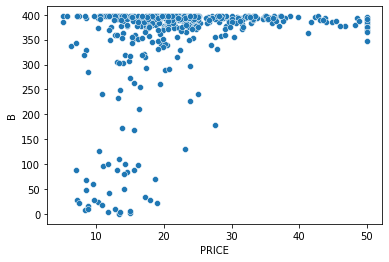

Price vs LSTAT


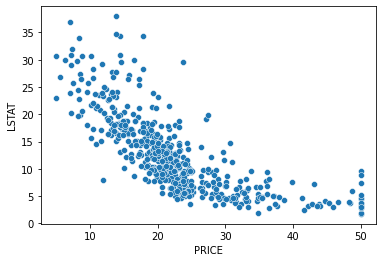

In [17]:
print("Scatter plot for Linearity\n")
for i in df.columns.drop(['PRICE']):
        print("Price vs",i)
        sns.scatterplot(data=df,x=df['PRICE'],y=df[i])
        plt.show()

In [18]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


To check if the correlation is significant or not we do Pearsonr.

Null Hypothesis - H0 : There "IS NOT a significant linear relationship(correlation)" between x and y in the population.

Alternate Hypothesis - Ha : There "IS A SIGNIFICANT LINEAR RELATIONSHIP (correlation)" between x and y in the population.

In [19]:
for i in df.columns.drop(['PRICE']):
    print("\nCorrelation between Price and",i,":")
    correlation,p_value=0,0
    correlation,p_value=pearsonr(df[i],y)
    print("Correlation = ",correlation,"\nP_value = ",p_value)
    if p_value>0.05:
        print("Not Significant.")
    else:
        print("Significant.")   


Correlation between Price and CRIM :
Correlation =  -0.3883046085868114 
P_value =  1.1739870821941874e-19
Significant.

Correlation between Price and ZN :
Correlation =  0.36044534245054394 
P_value =  5.713584153078143e-17
Significant.

Correlation between Price and INDUS :
Correlation =  -0.48372516002837274 
P_value =  4.90025998175163e-31
Significant.

Correlation between Price and CHAS :
Correlation =  0.17526017719029904 
P_value =  7.39062317051756e-05
Significant.

Correlation between Price and NOX :
Correlation =  -0.427320772373283 
P_value =  7.065041586250705e-24
Significant.

Correlation between Price and RM :
Correlation =  0.6953599470715388 
P_value =  2.4872288710082904e-74
Significant.

Correlation between Price and AGE :
Correlation =  -0.376954565004596 
P_value =  1.5699822091877373e-18
Significant.

Correlation between Price and DIS :
Correlation =  0.24992873408590385 
P_value =  1.2066117273368017e-08
Significant.

Correlation between Price and RAD :
Correlati

### Checking for Normality of Dependent Variable:

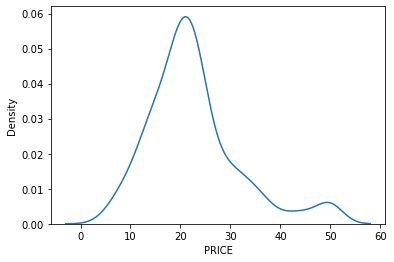

In [20]:
sns.kdeplot(y)
plt.show()

Dependent variable is not normally distributed.

To check the normality of the dependent variable, we do Shapiro-Wilk test.

Null Hypothesis - H0 : The data is normally distributed.

Alternate Hypothesis - Ha : The data is not normally distributed.

If the chosen alpha level is 0.05 and the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected. If the p-value is greater than 0.05, then the null hypothesis is not rejected.

#### Shapiro-Wilk test

In [21]:
statistic,p = stats.shapiro(y)
print("Statistic = ",statistic,"\nP_value = ",p)
if p>0.05:
    print("Significant.")
else:
    print("Not Significant.")

Statistic =  0.91717529296875 
P_value =  4.940618243974614e-16
Not Significant.


### Performing MinMaxScaling on Xtrain and Xtest:
Since Linear Regression is a distance based model it is important to scale the data.

In [22]:
scaler=MinMaxScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

### Model Building:

## Linear

In [23]:
modelLinear = LinearRegression()
modelLinear.fit(train_x,train_y)

LinearRegression()

In [24]:
linear_train = r2_score(train_y,modelLinear.predict(train_x))
linear_test = r2_score(test_y,modelLinear.predict(test_x))
rmse_linear_train = mean_squared_error(train_y, modelLinear.predict(train_x), squared=False)
rmse_linear_test = mean_squared_error(test_y, modelLinear.predict(test_x), squared=False)

# Decision tree Regressor

In [25]:
modeldtr = DecisionTreeRegressor(random_state=42,max_depth=5)
modeldtr.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [26]:
dtr_train = r2_score(train_y,modeldtr.predict(train_x))
dtr_test = r2_score(test_y,modeldtr.predict(test_x))
rmse_dtr_train = mean_squared_error(train_y, modeldtr.predict(train_x), squared=False)
rmse_dtr_test = mean_squared_error(test_y, modeldtr.predict(test_x), squared=False)

# Random Forest Regressor

In [27]:
modelrfr = RandomForestRegressor(random_state=42)
modelrfr.fit(train_x,train_y)

RandomForestRegressor(random_state=42)

In [28]:
rfr_train = r2_score(train_y,modelrfr.predict(train_x))
rfr_test = r2_score(test_y,modelrfr.predict(test_x))
rmse_rfr_train = mean_squared_error(train_y, modelrfr.predict(train_x), squared=False)
rmse_rfr_test = mean_squared_error(test_y, modelrfr.predict(test_x), squared=False)

# Gradient Boosting Regressor

In [29]:
modelgbr = GradientBoostingRegressor(max_depth=7,random_state=101)
modelgbr.fit(train_x,train_y)

GradientBoostingRegressor(max_depth=7, random_state=101)

In [30]:
gbr_train = r2_score(train_y,modelgbr.predict(train_x))
gbr_test = r2_score(test_y,modelgbr.predict(test_x))
rmse_gbr_train = mean_squared_error(train_y, modelgbr.predict(train_x), squared=False)
rmse_gbr_test = mean_squared_error(test_y, modelgbr.predict(test_x), squared=False)

# Ada Boost Regressor

In [31]:
modelabr = AdaBoostRegressor(random_state=42)
modelabr.fit(train_x,train_y)

AdaBoostRegressor(random_state=42)

In [32]:
abr_train = r2_score(train_y,modelabr.predict(train_x))
abr_test = r2_score(test_y,modelgbr.predict(test_x))
rmse_abr_train = mean_squared_error(train_y, modelabr.predict(train_x), squared=False)
rmse_abr_test = mean_squared_error(test_y, modelabr.predict(test_x), squared=False)

# XGBoost

In [33]:
modelxg = xgb.XGBRegressor(random_state=42,max_depth = 8)
modelxg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [34]:
xg_train = r2_score(train_y,modelxg.predict(train_x))
xg_test = r2_score(test_y,modelxg.predict(test_x))
rmse_xg_train = mean_squared_error(train_y, modelxg.predict(train_x), squared=False)
rmse_xg_test = mean_squared_error(test_y, modelxg.predict(test_x), squared=False)

# Ridge

In [35]:
modelrdg = Ridge(random_state=108)
modelrdg.fit(train_x,train_y)

Ridge(random_state=108)

In [36]:
rdg_train = r2_score(train_y,modelrdg.predict(train_x))
rdg_test = r2_score(test_y,modelrdg.predict(test_x))
rmse_rdg_train = mean_squared_error(train_y, modelrdg.predict(train_x), squared=True)
rmse_rdg_test = mean_squared_error(test_y, modelrdg.predict(test_x), squared=True)

# OLS

In [37]:
train_x_2 = train_x.copy()
train_x_2=sm.add_constant(train_x_2)

In [38]:
model=sm.OLS(train_y,train_x_2).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Mon, 25 Apr 2022   Prob (F-statistic):          6.21e-109
Time:                        18:56:04   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0069      2.565      9.750      0.000      19.964      30.050
x1           -10.0583      3.095     -3.250      0.001     -16.143      -3.974
x2             3.0110      1.600      1.882      0.061      -0.134       6.156
x3             1.0903      1.819      0.599      0.549      -2.486       4.666
x4             2.7844      0.956      2.914      0.004       0.905       4.663
x5            -8.3605      2.059     -4.061      0.000     -12.408      -4.313
x6            21.8258      2.281      9.567      0.000      17.340      26.311
x7            -0.6114      1.415     -0.432      0.666      -3.392       2.170
x8           -15.9220      2.485     -6.408      0.000     -20.807     -11.037
x9             6.0359      1.748      3.454      0.001       2.600       9.472
x10           -5.5789      2.224     -2.508      0.013      -9.952      -1.206
x11           -8.6053      1.354     -6.357      0.000     -11.266      -5.944
x12            4.8983      1.176      4.166      0.000       2.586       7.210
x13          -18.4306      2.018     -9.133      0.000     -22.398     -14.463
==============================================================================
Omnibus:                      133.052   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.817
Skew:                           1.379   Prob(JB):                    1.24e-126
Kurtosis:                       8.181   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
table = [["Model Name","Train Accuracy","Test Accuracy","RMSE Train","RMSE Test"],['','','',''],["LinearReg",linear_train,linear_test,rmse_linear_train,rmse_linear_test],["DecisionTreeReg",dtr_train,dtr_test,rmse_dtr_train,rmse_dtr_test],["RandomForestReg",rfr_train,rfr_test,rmse_rfr_train,rmse_rfr_test],["GradientBoostingReg",gbr_train,gbr_test,rmse_gbr_train,rmse_gbr_test],["AdaBoostReg",abr_train,abr_test,rmse_abr_train,rmse_abr_test],["XG_Boost",xg_train,xg_test,rmse_xg_train,rmse_xg_test],["Ridge",rdg_train,rdg_test,rmse_rdg_train,rmse_rdg_test]]

In [41]:
print(tabulate(table))

-------------------  ------------------  ------------------  ---------------------  ------------------
Model Name           Train Accuracy      Test Accuracy       RMSE Train             RMSE Test

LinearReg            0.7508856358979673  0.6687594935356316  4.6520331848801675     4.9286021826653394
DecisionTreeReg      0.9185171013474737  0.8833565347917995  2.660582034089698      2.924706239034417
RandomForestReg      0.9772384234821163  0.8921390213790762  1.4061918890083493     2.8124461981782085
GradientBoostingReg  0.9999319359241845  0.9377687761659845  0.07689576025265726    2.1362703654840174
AdaBoostReg          0.903116668139019   0.9377687761659845  2.9011350905191304     3.445155410548963
XG_Boost             0.9999999845164192  0.9207643723881005  0.0011597893634531825  2.410528641991864
Ridge                0.7469843718778246  0.6764100365423613  21.980328837907155     23.73007621305931
-------------------  ------------------  ------------------  ---------------------  -

## *Gradient Boosting* Regression is the best fit to predict house price

### Let's Make predictions

In [42]:
train_x.shape

(404, 13)

In [43]:
idx = 480 #random number
single_test_x = [df.iloc[idx].drop('PRICE').tolist()]
single_test_y = df.iloc[idx]['PRICE']

In [44]:
single_prediction = modelgbr.predict(single_test_x)
print('For this sample, our model predicted %s and it was actually %s' % (round(single_prediction[0],2), single_test_y))

For this sample, our model predicted 23.2 and it was actually 23.0


##### Entire test set

In [45]:
predictions = modelgbr.predict(test_x)

##### We can create a dataframe to see these in table form:

In [46]:
resultsDF = pd.DataFrame({
        'true':test_y,
        'predicted':predictions
    })
resultsDF.head()

,true,predicted
173,23.6,23.776612
274,32.4,32.356989
491,13.6,17.247005
72,22.8,22.104693
452,16.1,17.842393


We see the model has a 93.78% accuracy

In [47]:
print('Accuracy: %.2f%%' % (r2_score(test_y,predictions)*100))

Accuracy: 93.78%


##  *In My opinion, anything greater than 90% is a great model performance.*